## Libraries

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import NullLocator
import matplotlib.image as mpimg
from scipy.fft import fft2, ifft2, fftshift

## Read image

In [2]:
img = mpimg.imread('Images/cameraman.tif')

## Plotting image

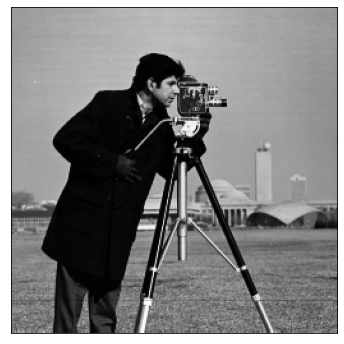

In [3]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(img, cmap = 'gray')

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())

## DFT

In [4]:
img_DFT = fft2(img)

## Fftshift

In [5]:
img_DFT_shift = fftshift(img_DFT)

## Plotting image frequency with fftshift

In [6]:
img_DFT_process = np.power(abs(img_DFT), 1/4).astype(np.int32)
img_DFT_shift_processed = np.power(abs(img_DFT_shift), 1/4).astype(np.int32)

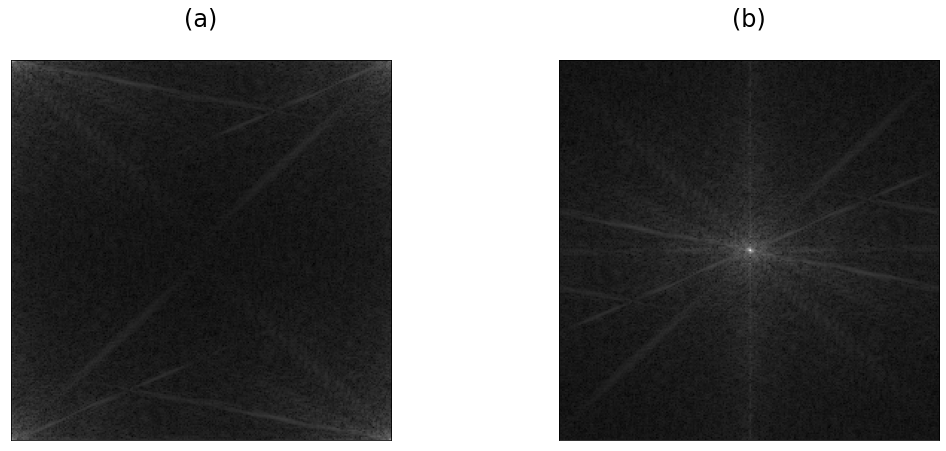

In [7]:
fig, axs = plt.subplots(1,2, figsize = (18,7))

axs[0].imshow(img_DFT_process, cmap = 'gray')
axs[1].imshow(img_DFT_shift_processed, cmap = 'gray')

titles = ['(a)\n', '(b)\n']

for ax, title in zip(axs, titles):
        
    # Set title
        
    ax.set_title(title, fontsize = 24)
        
    # Remove axis
        
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())
    
plt.savefig("Results/frequency_domain_shift.pdf", bbox_inches = 'tight')

## Inverse DFT

In [8]:
img_shift = abs(ifft2(img_DFT_shift))

## Plotting image rewrite with fftshift

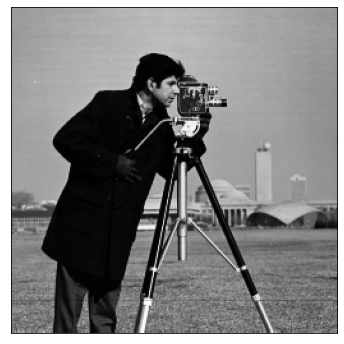

In [9]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(img_shift, cmap = 'gray')

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())

## Compute g

In [10]:
def compute_g(img):
    
    M, N = img.shape
    
    g = np.zeros_like(img)
    
    for m in range(M):
        for n in range(N):
            g[m][n] = np.power(-1,m+n)*img[m][n]
            
    return g

In [11]:
g = compute_g(img.astype(float))
g[g < 0 ] = 0

## Plotting g

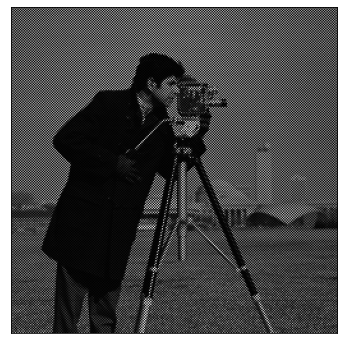

In [12]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(g, cmap = 'gray')

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())

## Plotting the two images

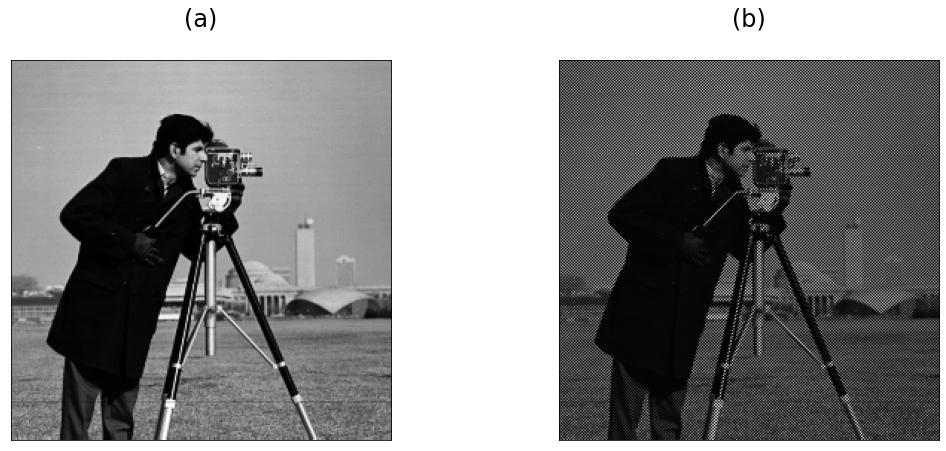

In [13]:
fig, axs = plt.subplots(1,2, figsize = (18,7))

axs[0].imshow(img_shift, cmap = 'gray')
axs[1].imshow(g, cmap = 'gray')

titles = ['(a)\n', '(b)\n']

for ax, title in zip(axs, titles):
        
    # Set title
        
    ax.set_title(title, fontsize = 24)
        
    # Remove axis
        
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())
    
plt.savefig("Results/fftshift.pdf", bbox_inches = 'tight')

## Apply fftshift in the domain space

In [14]:
img_space_shift = fftshift(img)

## Plotting image after space shift

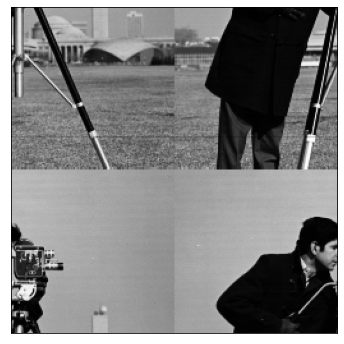

In [15]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(img_space_shift, cmap = 'gray')

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())

plt.savefig("Results/image_shift.pdf", bbox_inches = 'tight')

## DFT

In [16]:
img_DFT_space_shift = fft2(img_space_shift)

## Plotting frequency domain

In [17]:
img_DFT_space_shift_process = np.power(abs(img_DFT_space_shift), 1/4).astype(np.int32)

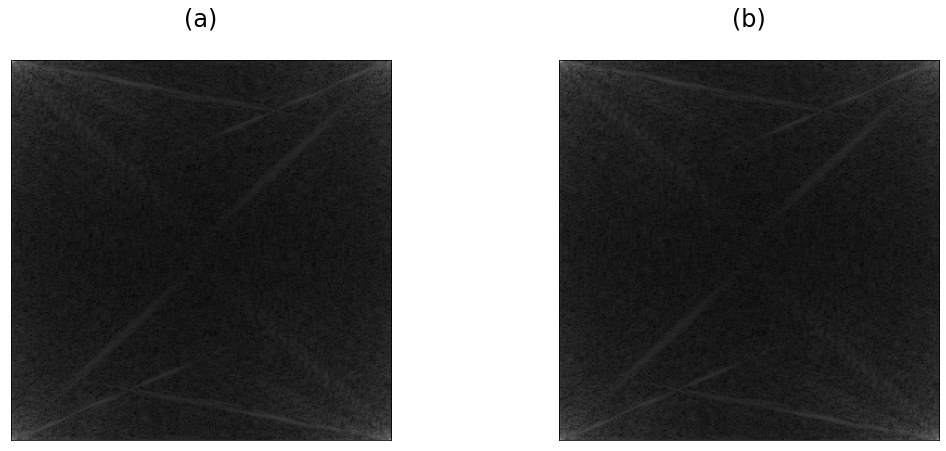

In [18]:
fig, axs = plt.subplots(1,2, figsize = (18,7))

axs[0].imshow(img_DFT_process, cmap = 'gray')
axs[1].imshow(img_DFT_space_shift_process, cmap = 'gray')

titles = ['(a)\n', '(b)\n']

for ax, title in zip(axs, titles):
        
    # Set title
        
    ax.set_title(title, fontsize = 24)
        
    # Remove axis
        
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())
    
plt.savefig("Results/space_domain_shift.pdf", bbox_inches = 'tight')